<a href="https://colab.research.google.com/github/Naresh-Telukutla/NLP_Auto_Ticket_Assign/blob/main/CapStone_AutomatedTicketClassification_0415.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Capstone Project - Problem Statement
Great Learning PGP - ARTIFICIAL INTELLIGENCE & MACHINE LEARNING culminates with a Capstone Project. 
Automatic Ticket Assignment is given as the final capstone project.

This Project involves “Natural Language Processing” and consists of analyzing ticket short desctiption and description and other relevant features to arrive at a model to automatically assign a ticket to one of the Groups


####Objectives of the project:



*   Load and clean the files for analysis
*   Exploratory analysis on data present in the files
*   Build frequency plots and word clouds to pictorially represent the data
*   Understand the specifics of the each text column and be able to tokenize the words   
*   Complete Fetaure Engineering to decide on features required for model
*   Complete Hypothesis testing, if required
*   Build Models aimed at predicting Assignment Group
*   Finalize on one best and accurate model










####Summary of Data



*   Data set has one Label and three independent Features
*   There are 74 unique values, Label Assignment Group can take
*   Data set has some features with null values, and they are in minority
*   Data set has some duplicate entries and can be removed
*   75% of the Groups have less than 100 tickets assigned
*   Dataset is Highly skewed with most tickets assigned to GR0
*   Many Assignment groups have less representation in this Dataset




####Summary of Findings:

###Exploratory Data Analysis

#### Import necessary libraries and load the input data file

In [65]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from google.colab import drive
import string
import unicodedata
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
# Importing Train, Test Split
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
# Importing DecisionTreeClassifier from sklearn
from sklearn.tree import DecisionTreeClassifier
# Importing Random Forest Classifier from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
# Import pickle to save and load the model
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

import nltk
from nltk.corpus import wordnet,stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.callbacks import ModelCheckpoint  
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.models import Sequential
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten
from keras.callbacks import EarlyStopping

from keras.models import load_model
from tqdm import tqdm


import warnings
warnings.filterwarnings('ignore')

In [8]:
## NLTK Downloads
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english')) 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Connect Google drive to access data file

In [9]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


#### Read the datafile - excel file from google drive

In [10]:
## Read the data from EXCEL
#incidents = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/00_Capstone Project/input_data.xlsx')
incidents = pd.read_excel('/content/drive/My Drive/AIML/Projects/Capstone/Data/NLP_Input_Data.xlsx')
incidents.head(20)

Short description  \
0                                         login issue   
1                                             outlook   
2                                  cant log in to vpn   
3                       unable to access hr_tool page   
4                                        skype error    
5      unable to log in to engineering tool and skype   
6   event: critical:HostName_221.company.com the v...   
7   ticket_no1550391- employment status - new non-...   
8                unable to disable add ins on outlook   
9                     ticket update on inplant_874773   
10  engineering tool says not connected and unable...   
11            hr_tool site not loading page correctly   
12  unable to login to hr_tool to sgxqsuojr xwbeso...   
13                   user wants to reset the password   
14                           unable to open payslips    
15                    ticket update on inplant_874743   
16                     unable to login to company vpn   
17      when undocking pc , screen will not come back   
18                          erp SID_34 account locked   
19                            unable to sign into vpn   

                                          Description             Caller  \
0   -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1   _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2   _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                       unable to access hr_tool page  xbkucsvz gcpydteq   
4                                        skype error   owlgqjme qhcozdfx   
5      unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6   event: critical:HostName_221.company.com the v...  jyoqwxhz clhxsoqy   
7   ticket_no1550391- employment status - new non-...  eqzibjhw ymebpoih   
8                unable to disable add ins on outlook  mdbegvct dbvichlg   
9                     ticket update on inplant_874773  fumkcsji sarmtlhy   
10  engineering tool says not connected and unable...  badgknqs xwelumfz   
11            hr_tool site not loading page correctly  dcqsolkx kmsijcuz   
12  unable to login to hr_tool to sgxqsuojr xwbeso...  oblekmrw qltgvspb   
13                   user wants to reset the password  iftldbmu fujslwby   
14                           unable to open payslips   epwyvjsz najukwho   
15                    ticket update on inplant_874743  fumkcsji sarmtlhy   
16  \n\nreceived from: xyz@company.com\n\nhi,\n\ni...  chobktqj qdamxfuc   
17      when undocking pc , screen will not come back  sigfdwcj reofwzlm   
18                          erp SID_34 account locked  nqdyowsm yqerwtna   
19                            unable to sign into vpn  ftsqkvre bqzrupic   

   Assignment group  
0             GRP_0  
1             GRP_0  
2             GRP_0  
3             GRP_0  
4             GRP_0  
5             GRP_0  
6             GRP_1  
7             GRP_0  
8             GRP_0  
9             GRP_0  
10            GRP_0  
11            GRP_0  
12            GRP_0  
13            GRP_0  
14            GRP_0  
15            GRP_0  
16            GRP_0  
17            GRP_3  
18            GRP_0  
19            GRP_0

#### Perform all the necessary Data Analysis and Data visualization

In [11]:
incidents.shape

(8500, 4)

In [12]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


Tickets are assigned to 74 distinct Assignment Groups

In [13]:
# incidents["Assignment group"].unique()
incidents["Assignment group"].nunique()


74

In [14]:
# incidents["Assignment group"].unique()
incidents["Caller"].nunique()

2950

In [15]:
incidentset_callergrp = incidents.groupby(['Caller']).size().reset_index(name='counts')
incidentset_callergrp

Caller  counts
0     DEsowkrH sciejzNE       2
1     HdOuWxAt qfKdlJMx       1
2     ZkBogxib QsEJzdZO     151
3     abiuclvj brziktno       1
4     abtknpew ifcekjdb       1
...                 ...     ...
2945  zylaexnv pvkzbduh       3
2946  zylwdbig wdkbztjp       1
2947  zymdwqsi jzvbthil       1
2948  zywoxerf paqxtrfk       9
2949  zyxjagro vjgozhpn       2

[2950 rows x 2 columns]

In [16]:
incidentset_callergrp.sort_values(["counts"], axis=0, ascending=False, inplace=True) 

Lets check Tickets raised by each caller

In [17]:
incidentset_callergrp.head(20)

Caller  counts
182   bpctwhsn kzqsbmtp     810
2     ZkBogxib QsEJzdZO     151
646   fumkcsji sarmtlhy     134
1902  rbozivdq gmlhrtvp      87
1945  rkupnshb gsmzfojw      71
1044  jloygrwh acvztedi      64
2087  spxqmiry zpwgoqju      63
1587  oldrctiu bxurpsyi      57
1586  olckhmvx pcqobjnd      54
1098  jyoqwxhz clhxsoqy      51
386   dkmcfreg anwmfvlg      51
479   efbwiadp dicafxhv      45
24    afkstcev utbnkyop      32
762   gzhapcld fdigznbk      30
1378  mnlazfsr mtqrkhnx      28
2364  uvrbhlnt bjrmalzi      27
511   entuakhp xrnhtdmk      25
2501  vzqomdgt jwoqbuml      24
1035  jionmpsf wnkpzcmv      24
181   bozdftwx smylqejw      23

Check for null values in all features

In [18]:
incidents[incidents.isnull().any(axis=1)]

Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description             Caller  \
2604  _x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...  ohdrnswl rezuibdt   
3383  _x000D_\n-connected to the user system using t...  qftpazns fxpnytmk   
3906  -user unable  tologin to vpn._x000D_\n-connect...  awpcmsey ctdiuqwe   
3910  -user unable  tologin to vpn._x000D_\n-connect...  rhwsmefo tvphyura   
3915  -user unable  tologin to vpn._x000D_\n-connect...  hxripljo efzounig   
3921  -user unable  tologin to vpn._x000D_\n-connect...  cziadygo veiosxby   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...  wvqgbdhm fwchqjor   
4341  _x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...  eqmuniov ehxkcbgj   
4395                                                NaN  viyglzfo ajtfzpkb   

     Assignment group  
2604           GRP_34  
3383            GRP_0  
3906            GRP_0  
3910            GRP_0  
3915            GRP_0  
3921            GRP_0  
3924            GRP_0  
4341            GRP_0  
4395            GRP_0

Check for presence of duplicates

In [19]:
incidents_subset = incidents[['Short description', 'Description', 'Caller','Assignment group']].copy()
duplicateIncidentRows = incidents_subset[incidents_subset.duplicated()]
duplicateIncidentRows

Short description  \
51                           call for ecwtrjnq jpecxuty   
229                          call for ecwtrjnq jpecxuty   
493                     ticket update on inplant_872730   
512                                    blank call //gso   
667   job bkbackup_tool_powder_prod_full failed in j...   
...                                                 ...   
7836             probleme mit erpgui \tmqfjard qzhgdoua   
8051               issue on pricing in distributor_tool   
8093  reset passwords for prgthyuulla ramdntythanjes...   
8347                           blank call // loud noise   
8405                           unable to launch outlook   

                                            Description             Caller  \
51                           call for ecwtrjnq jpecxuty  olckhmvx pcqobjnd   
229                          call for ecwtrjnq jpecxuty  olckhmvx pcqobjnd   
493                     ticket update on inplant_872730  fumkcsji sarmtlhy   
512                                    blank call //gso  rbozivdq gmlhrtvp   
667   received from: monitoring_tool@company.com_x00...  bpctwhsn kzqsbmtp   
...                                                 ...                ...   
7836             probleme mit erpgui \tmqfjard qzhgdoua  tmqfjard qzhgdoua   
8051  we have agreed price with many of the distribu...  hbmwlprq ilfvyodx   
8093                                                the  boirqctx bkijgqry   
8347                           blank call // loud noise  rbozivdq gmlhrtvp   
8405                           unable to launch outlook  wjtzrmqc ikqpbflg   

     Assignment group  
51              GRP_0  
229             GRP_0  
493             GRP_0  
512             GRP_0  
667             GRP_8  
...               ...  
7836           GRP_24  
8051           GRP_21  
8093           GRP_17  
8347            GRP_0  
8405            GRP_0  

[83 rows x 4 columns]

Drop duplicate rows from dataset, as they will not add any value to prediction

In [20]:
incidents_newset = incidents.drop_duplicates(['Short description', 'Description', 'Caller', 'Assignment group'])

In [21]:
incidents_newset.shape

(8417, 4)

In [22]:
incidents_newset[incidents_newset.isnull().any(axis=1)]

Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description             Caller  \
2604  _x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...  ohdrnswl rezuibdt   
3383  _x000D_\n-connected to the user system using t...  qftpazns fxpnytmk   
3906  -user unable  tologin to vpn._x000D_\n-connect...  awpcmsey ctdiuqwe   
3910  -user unable  tologin to vpn._x000D_\n-connect...  rhwsmefo tvphyura   
3915  -user unable  tologin to vpn._x000D_\n-connect...  hxripljo efzounig   
3921  -user unable  tologin to vpn._x000D_\n-connect...  cziadygo veiosxby   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...  wvqgbdhm fwchqjor   
4341  _x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...  eqmuniov ehxkcbgj   
4395                                                NaN  viyglzfo ajtfzpkb   

     Assignment group  
2604           GRP_34  
3383            GRP_0  
3906            GRP_0  
3910            GRP_0  
3915            GRP_0  
3921            GRP_0  
3924            GRP_0  
4341            GRP_0  
4395            GRP_0

Drop any rows with null values and as they are very less in number, they may not impact the prediction and thus better to drop then to impute

In [23]:
incidents_newset.dropna(inplace=True)
incidents_newset.shape

(8408, 4)

In [24]:
incidentnewset_groupby_Assignemntgrp = incidents_newset.groupby(['Assignment group']).size().reset_index(name='counts')
incidentnewset_groupby_Assignemntgrp

Assignment group  counts
0             GRP_0    3926
1             GRP_1      31
2            GRP_10     140
3            GRP_11      30
4            GRP_12     257
..              ...     ...
69           GRP_71       2
70           GRP_72       2
71           GRP_73       1
72            GRP_8     645
73            GRP_9     252

[74 rows x 2 columns]

In [25]:
incidentnewset_groupby_Assignemntgrp.describe()

counts
count    74.000000
mean    113.621622
std     459.823990
min       1.000000
25%       5.250000
50%      26.000000
75%      81.000000
max    3926.000000

Looking at the 75% which is less than 100 counts..

In [26]:
incidents_newset["Caller"].nunique()

2948

In [27]:
incidentnewset_groupby_Callergrp = incidents_newset.groupby(['Caller','Assignment group']).size().reset_index(name='counts')
incidentnewset_groupby_Callergrp

Caller Assignment group  counts
0     DEsowkrH sciejzNE           GRP_13       1
1     DEsowkrH sciejzNE           GRP_18       1
2     HdOuWxAt qfKdlJMx            GRP_0       1
3     ZkBogxib QsEJzdZO            GRP_1       1
4     ZkBogxib QsEJzdZO           GRP_10       2
...                 ...              ...     ...
4456  zylaexnv pvkzbduh            GRP_0       3
4457  zylwdbig wdkbztjp            GRP_0       1
4458  zymdwqsi jzvbthil            GRP_0       1
4459  zywoxerf paqxtrfk            GRP_0       9
4460  zyxjagro vjgozhpn            GRP_0       2

[4461 rows x 3 columns]

In [28]:
incidentnewset_groupby_Callergrp[incidentnewset_groupby_Callergrp['Assignment group'] == 'GRP_0'].counts.max()

126

In [29]:
incidentnewset_groupby_Callergrp.sort_values(["counts"], axis=0, ascending=False, inplace=True) 

In [30]:
incidentnewset_groupby_Callergrp.head(20)

Caller Assignment group  counts
308   bpctwhsn kzqsbmtp            GRP_8     346
309   bpctwhsn kzqsbmtp            GRP_9     153
983   fumkcsji sarmtlhy            GRP_0     126
304   bpctwhsn kzqsbmtp            GRP_5      95
306   bpctwhsn kzqsbmtp            GRP_6      88
2864  rbozivdq gmlhrtvp            GRP_0      71
295   bpctwhsn kzqsbmtp           GRP_10      60
10    ZkBogxib QsEJzdZO            GRP_8      54
2382  olckhmvx pcqobjnd            GRP_0      47
746   efbwiadp dicafxhv            GRP_0      45
2946  rkupnshb gsmzfojw            GRP_8      37
9     ZkBogxib QsEJzdZO            GRP_6      35
11    ZkBogxib QsEJzdZO            GRP_9      31
618   dkmcfreg anwmfvlg            GRP_8      30
3172  spxqmiry zpwgoqju            GRP_8      26
2392  oldrctiu bxurpsyi            GRP_8      25
1590  jloygrwh acvztedi            GRP_8      25
1565  jionmpsf wnkpzcmv           GRP_24      23
1676  jyoqwxhz clhxsoqy            GRP_8      23
789   entuakhp xrnhtdmk           GRP_41      22

In [31]:
incidentnewset_groupby_Callergrp['counts']

308     346
309     153
983     126
304      95
306      88
       ... 
1744      1
1745      1
1747      1
1749      1
2230      1
Name: counts, Length: 4461, dtype: int64

In [32]:
## is there any significance of the column caller

## NO SIGNIFICANCE on the Caller feature, lets prove with Hypothesis testing in coming sections

In [33]:
incidentnewset_groupby_Assignemntgrp["count_perc"] = round((incidentnewset_groupby_Assignemntgrp["counts"]/incidents_newset.shape[0])*100,2)
incidentnewset_groupby_Assignemntgrp.sort_values(["count_perc"], axis=0, 
                 ascending=False, inplace=True) 

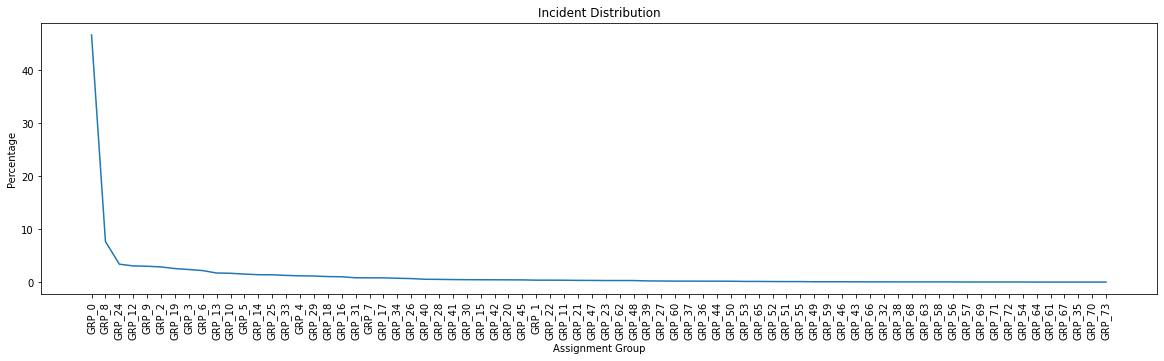

In [34]:
plt.subplots(figsize = (20,5))
 
plt.plot(incidentnewset_groupby_Assignemntgrp["Assignment group"], incidentnewset_groupby_Assignemntgrp["count_perc"]) 
plt.xlabel('Assignment Group') 
plt.ylabel('Percentage') 
plt.xticks(rotation=90)
plt.title('Incident Distribution') 
  
 
plt.show()

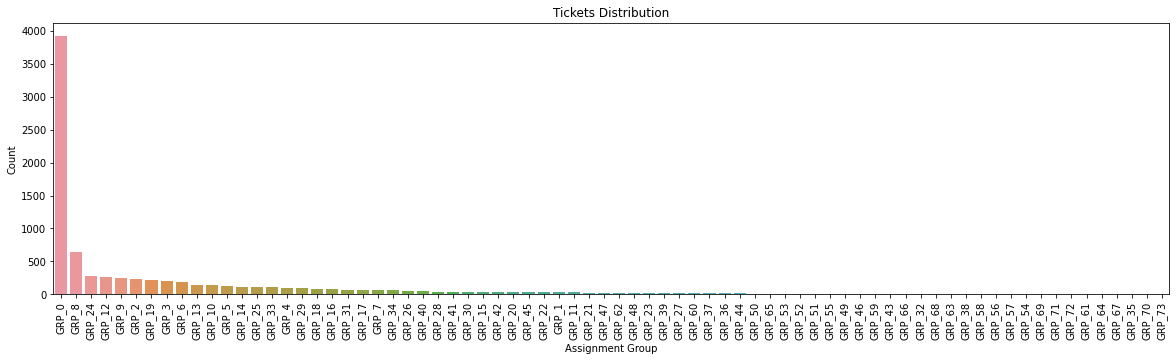

In [35]:

plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=incidents_newset,order = incidents_newset['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

In [36]:
incidents_newset['Assignment group'].value_counts()

GRP_0     3926
GRP_8      645
GRP_24     285
GRP_12     257
GRP_9      252
          ... 
GRP_64       1
GRP_67       1
GRP_35       1
GRP_70       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

This is a long list of groups and the data is completely imbalanced

###Pre Processing and Feature Engineering

#### Hypothesis Testing

Caller information does not have predictive power in deciding the Assignment Group of Ticket. We would like to prove Caller Group and Assignment Group are independent

H0 :- Caller and Assignment Group are independent Categorical values

In [37]:
incidents_newset.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [61]:
dataset_table=pd.crosstab(incidents_newset['Caller'],incidents_newset['Assignment group'])
print(dataset_table)

Assignment group   GRP_0  GRP_1  GRP_10  GRP_11  GRP_12  GRP_13  GRP_14  \
Caller                                                                    
DEsowkrH sciejzNE      0      0       0       0       0       1       0   
HdOuWxAt qfKdlJMx      1      0       0       0       0       0       0   
ZkBogxib QsEJzdZO      0      1       2       0       0       0       2   
abiuclvj brziktno      0      0       0       0       0       0       0   
abtknpew ifcekjdb      1      0       0       0       0       0       0   
...                  ...    ...     ...     ...     ...     ...     ...   
zylaexnv pvkzbduh      3      0       0       0       0       0       0   
zylwdbig wdkbztjp      1      0       0       0       0       0       0   
zymdwqsi jzvbthil      1      0       0       0       0       0       0   
zywoxerf paqxtrfk      9      0       0       0       0       0       0   
zyxjagro vjgozhpn      2      0       0       0       0       0       0   

Assignment group   GRP_1

In [62]:
dataset_table.values

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  2, ...,  0, 54, 31],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [ 9,  0,  0, ...,  0,  0,  0],
       [ 2,  0,  0, ...,  0,  0,  0]])

In [63]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 0  1  2 ...  0 54 31]
 ...
 [ 1  0  0 ...  0  0  0]
 [ 9  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  0  0]]


In [66]:
val=stats.chi2_contingency(dataset_table)
val

(266028.56742770015,
 0.0,
 215131,
 array([[9.33872502e-01, 7.37392959e-03, 3.33016175e-02, ...,
         2.37868696e-04, 1.53425309e-01, 5.99429115e-02],
        [4.66936251e-01, 3.68696480e-03, 1.66508088e-02, ...,
         1.18934348e-04, 7.67126546e-02, 2.99714558e-02],
        [7.05073739e+01, 5.56731684e-01, 2.51427212e+00, ...,
         1.79590866e-02, 1.15836108e+01, 4.52568982e+00],
        ...,
        [4.66936251e-01, 3.68696480e-03, 1.66508088e-02, ...,
         1.18934348e-04, 7.67126546e-02, 2.99714558e-02],
        [4.20242626e+00, 3.31826832e-02, 1.49857279e-01, ...,
         1.07040913e-03, 6.90413892e-01, 2.69743102e-01],
        [9.33872502e-01, 7.37392959e-03, 3.33016175e-02, ...,
         2.37868696e-04, 1.53425309e-01, 5.99429115e-02]]))

In [67]:
Expected_Values=val[3]
Expected_Values

array([[9.33872502e-01, 7.37392959e-03, 3.33016175e-02, ...,
        2.37868696e-04, 1.53425309e-01, 5.99429115e-02],
       [4.66936251e-01, 3.68696480e-03, 1.66508088e-02, ...,
        1.18934348e-04, 7.67126546e-02, 2.99714558e-02],
       [7.05073739e+01, 5.56731684e-01, 2.51427212e+00, ...,
        1.79590866e-02, 1.15836108e+01, 4.52568982e+00],
       ...,
       [4.66936251e-01, 3.68696480e-03, 1.66508088e-02, ...,
        1.18934348e-04, 7.67126546e-02, 2.99714558e-02],
       [4.20242626e+00, 3.31826832e-02, 1.49857279e-01, ...,
        1.07040913e-03, 6.90413892e-01, 2.69743102e-01],
       [9.33872502e-01, 7.37392959e-03, 3.33016175e-02, ...,
        2.37868696e-04, 1.53425309e-01, 5.99429115e-02]])

In [68]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [69]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

In [70]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 3958.7308769539895


In [71]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [72]:
if p_value<=alpha:
    print("Accept H0,There is no relationship between 2 categorical variables")
else:
    print("Retain H0,There is a relationship between 2 categorical variables")

Accept H0,There is no relationship between 2 categorical variables


#### Feature Engineering

Trying to simplify the problem statement as there are a lot of groups with very less number of training data

In [38]:
print('\nSum of counts between 0 and 50 : ',incidentnewset_groupby_Assignemntgrp[(incidentnewset_groupby_Assignemntgrp.counts<=50) & (incidentnewset_groupby_Assignemntgrp.counts>0)].sum())
print('\n\nSum of counts between 50 and 100 : ',incidentnewset_groupby_Assignemntgrp[(incidentnewset_groupby_Assignemntgrp.counts<=100) & (incidentnewset_groupby_Assignemntgrp.counts>50)].sum())
print('\n\nSum of counts between 100 and 150 : ',incidentnewset_groupby_Assignemntgrp[(incidentnewset_groupby_Assignemntgrp.counts<=150) & (incidentnewset_groupby_Assignemntgrp.counts>100)].sum())
print('\n\nSum of counts between 150 and 200 : ',incidentnewset_groupby_Assignemntgrp[(incidentnewset_groupby_Assignemntgrp.counts<=200) & (incidentnewset_groupby_Assignemntgrp.counts>150)].sum())


Sum of counts between 0 and 50 :  Assignment group    GRP_40GRP_28GRP_41GRP_30GRP_15GRP_42GRP_20GRP_...
counts                                                            758
count_perc                                                       9.04
dtype: object


Sum of counts between 50 and 100 :  Assignment group    GRP_4GRP_29GRP_18GRP_16GRP_31GRP_7GRP_17GRP_34...
counts                                                            692
count_perc                                                       8.24
dtype: object


Sum of counts between 100 and 150 :  Assignment group    GRP_13GRP_10GRP_5GRP_14GRP_25GRP_33
counts                                              754
count_perc                                         8.96
dtype: object


Sum of counts between 150 and 200 :  Assignment group    GRP_3GRP_6
counts                     383
count_perc                4.56
dtype: object


In [39]:
Orig_countBYgrp = pd.DataFrame(incidents_newset['Assignment group'].value_counts())
Orig_countBYgrp = Orig_countBYgrp.T
Orig_countBYgrp

GRP_0  GRP_8  GRP_24  GRP_12  GRP_9  GRP_2  GRP_19  GRP_3  \
Assignment group   3926    645     285     257    252    241     215    200   

                  GRP_6  GRP_13  ...  GRP_54  GRP_69  GRP_71  GRP_72  GRP_61  \
Assignment group    183     145  ...       2       2       2       2       1   

                  GRP_64  GRP_67  GRP_35  GRP_70  GRP_73  
Assignment group       1       1       1       1       1  

[1 rows x 74 columns]

In [40]:
incidents_newset['Count'] = incidents_newset.apply(lambda row: Orig_countBYgrp[row['Assignment group']] , axis=1)
incidents_newset['New Assignment group'] =incidents_newset['Assignment group'] 
incidents_newset.loc[(incidents_newset['Count'] <= 200) & (incidents_newset['Count'] > 150) , "New Assignment group"] = "GRP_CC"
incidents_newset.loc[(incidents_newset['Count'] <= 150) & (incidents_newset['Count'] > 100) , "New Assignment group"] = "GRP_CL"
incidents_newset.loc[(incidents_newset['Count'] <= 100) & (incidents_newset['Count'] > 50) , "New Assignment group"] = "GRP_C"
incidents_newset.loc[(incidents_newset['Count'] <= 50) & (incidents_newset['Count'] > 0) , "New Assignment group"] = "GRP_L"

In [41]:
incidents_newset.drop(columns='Count',inplace=True)
incidents_newset.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group New Assignment group  
0            GRP_0                GRP_0  
1            GRP_0                GRP_0  
2            GRP_0                GRP_0  
3            GRP_0                GRP_0  
4            GRP_0                GRP_0

In [42]:
incidentnewset_groupby_NewAssignemntgrp = incidents_newset.groupby(['New Assignment group']).size().reset_index(name='new counts')
incidentnewset_groupby_NewAssignemntgrp

New Assignment group  new counts
0                 GRP_0        3926
1                GRP_12         257
2                GRP_19         215
3                 GRP_2         241
4                GRP_24         285
5                 GRP_8         645
6                 GRP_9         252
7                 GRP_C         692
8                GRP_CC         383
9                GRP_CL         754
10                GRP_L         758

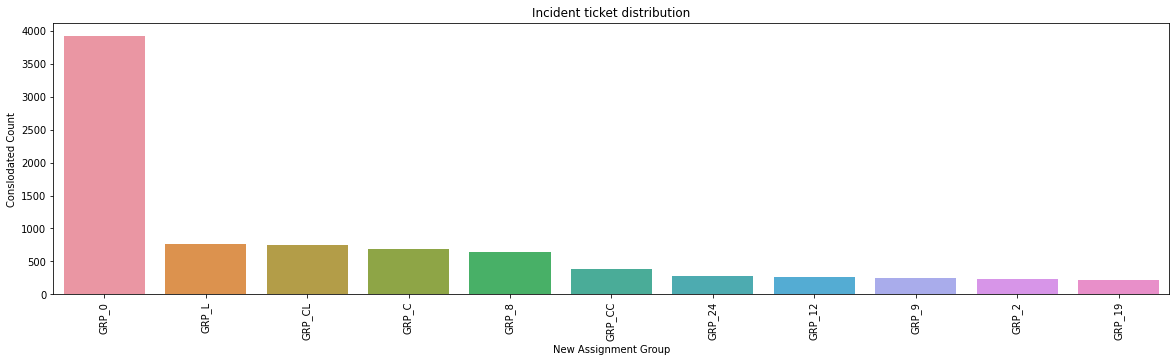

In [43]:
plt.subplots(figsize = (20,5))

sns.countplot(x='New Assignment group', data=incidents_newset,order = incidents_newset['New Assignment group'].value_counts().index)
plt.xlabel('New Assignment Group') 
plt.ylabel('Conslodated Count') 
plt.xticks(rotation=90)
plt.title('Incident ticket distribution')

plt.show()

In [44]:
# Lets ignore Group 0 for time being to understand the data spread which is 50% of the data
temp_data_without_grp0 = incidents_newset[incidents_newset["New Assignment group"] != 'GRP_0']
temp_data_without_grp0 

Short description  \
6     event: critical:HostName_221.company.com the v...   
17        when undocking pc , screen will not come back   
32                      duplication of network address.   
43    please reroute jobs on printer01 to printer02 ...   
47    job Job_1424 failed in job_scheduler at: 10/31...   
...                                                 ...   
8493           erp fi  - ob09, two accounts to be added   
8494  tablet needs reimaged due to multiple issues w...   
8495                  emails not coming in from zz mail   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
6     event: critical:HostName_221.company.com the v...  jyoqwxhz clhxsoqy   
17        when undocking pc , screen will not come back  sigfdwcj reofwzlm   
32    \n\nreceived from: kxsceyzo.naokumlb@gmail.com...  kxsceyzo naokumlb   
43    \n\nreceived from: yisohglr.uvteflgb@gmail.com...  yisohglr uvteflgb   
47    received from: monitoring_tool@company.com_x00...  bpctwhsn kzqsbmtp   
...                                                 ...                ...   
8493  i am sorry, i have another two accounts that n...  ipwjorsc uboapexr   
8494  tablet needs reimaged due to multiple issues w...  cpmaidhj elbaqmtp   
8495  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...  avglmrts vhqmtiua   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group New Assignment group  
6               GRP_1                GRP_L  
17              GRP_3               GRP_CC  
32              GRP_4                GRP_C  
43              GRP_5               GRP_CL  
47              GRP_6               GRP_CC  
...               ...                  ...  
8493           GRP_10               GRP_CL  
8494            GRP_3               GRP_CC  
8495           GRP_29                GRP_C  
8498           GRP_62                GRP_L  
8499           GRP_49                GRP_L  

[4482 rows x 5 columns]

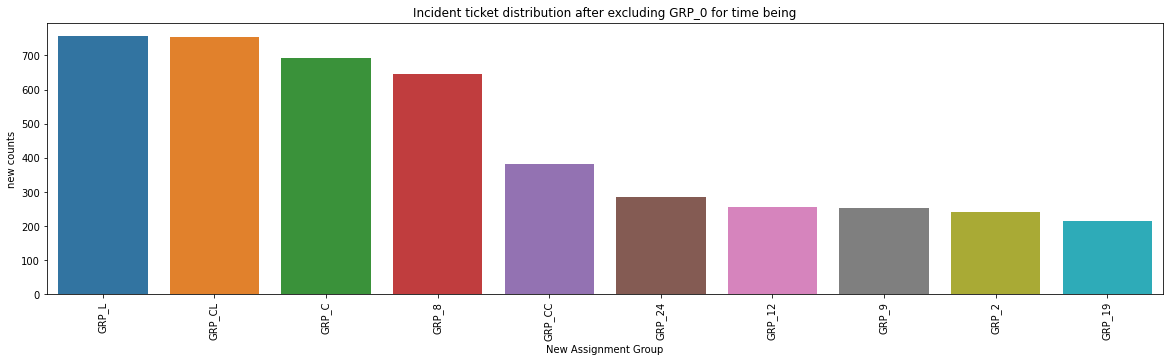

In [45]:

plt.subplots(figsize = (20,5))

# plt.plot(temp_data_without_grp0["New Assignment group"], order = temp_data_without_grp0['New Assignment group'].value_counts().index) 
sns.countplot(x='New Assignment group', data=temp_data_without_grp0,order = temp_data_without_grp0['New Assignment group'].value_counts().index)
plt.xlabel('New Assignment Group') 
plt.ylabel('new counts') 
plt.xticks(rotation=90)

plt.title('Incident ticket distribution after excluding GRP_0 for time being') 
  

plt.show() 

Need to check with Mentor Arun whether this is accepted based on the Problem statement

We can find where the Description and short description are same - we can ignore this data appending and for others we can do the data append

Merging the short description and the Description columns to Full description column ensuring that the data is not repeated

In [46]:
incidents_newset['Full Description'] = np.where(incidents_newset['Short description']==incidents_newset['Description'],incidents_newset['Description'], incidents_newset['Short description'] + ' '+ incidents_newset['Description'])

In [47]:
incidents_newset.head(10)

Short description  \
0                                        login issue   
1                                            outlook   
2                                 cant log in to vpn   
3                      unable to access hr_tool page   
4                                       skype error    
5     unable to log in to engineering tool and skype   
6  event: critical:HostName_221.company.com the v...   
7  ticket_no1550391- employment status - new non-...   
8               unable to disable add ins on outlook   
9                    ticket update on inplant_874773   

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   
5     unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6  event: critical:HostName_221.company.com the v...  jyoqwxhz clhxsoqy   
7  ticket_no1550391- employment status - new non-...  eqzibjhw ymebpoih   
8               unable to disable add ins on outlook  mdbegvct dbvichlg   
9                    ticket update on inplant_874773  fumkcsji sarmtlhy   

  Assignment group New Assignment group  \
0            GRP_0                GRP_0   
1            GRP_0                GRP_0   
2            GRP_0                GRP_0   
3            GRP_0                GRP_0   
4            GRP_0                GRP_0   
5            GRP_0                GRP_0   
6            GRP_1                GRP_L   
7            GRP_0                GRP_0   
8            GRP_0                GRP_0   
9            GRP_0                GRP_0   

                                    Full Description  
0  login issue -verified user details.(employee# ...  
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...  
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...  
3                      unable to access hr_tool page  
4                                       skype error   
5     unable to log in to engineering tool and skype  
6  event: critical:HostName_221.company.com the v...  
7  ticket_no1550391- employment status - new non-...  
8               unable to disable add ins on outlook  
9                    ticket update on inplant_874773

In [48]:
incident_df_final = incidents_newset.drop(columns=['Short description','Description','Caller'])
incident_df_final

Assignment group New Assignment group  \
0               GRP_0                GRP_0   
1               GRP_0                GRP_0   
2               GRP_0                GRP_0   
3               GRP_0                GRP_0   
4               GRP_0                GRP_0   
...               ...                  ...   
8495           GRP_29                GRP_C   
8496            GRP_0                GRP_0   
8497            GRP_0                GRP_0   
8498           GRP_62                GRP_L   
8499           GRP_49                GRP_L   

                                       Full Description  
0     login issue -verified user details.(employee# ...  
1     outlook _x000D_\n_x000D_\nreceived from: hmjdr...  
2     cant log in to vpn _x000D_\n_x000D_\nreceived ...  
3                         unable to access hr_tool page  
4                                          skype error   
...                                                 ...  
8495  emails not coming in from zz mail _x000D_\n_x0...  
8496                           telephony_software issue  
8497  vip2: windows password reset for tifpdchb pedx...  
8498  machine nÃ£o estÃ¡ funcionando i am unable to ...  
8499  an mehreren pc`s lassen sich verschiedene prgr...  

[8408 rows x 3 columns]

#### Text Pre-processing


In [49]:
#Remove numbers
def removeNumbers(text):
    """ Removes integers """
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

#Replace Contractions
contraction_patterns = [ (r'won\'t', 'will not'),(r'didn\'t', 'did not'),(r'didnt', 'did not'), (r'can\'t', 'cannot'),(r'cant', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]
def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

#Remove Stopwords
stoplist = stopwords.words('english')
stoplist.remove('no')
stoplist.remove('not')
def stp_words(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        if (w not in stoplist):
            finalTokens.append(w)
    text = " ".join(finalTokens)
    return text


#Remove mail related words
mail_words_list = ['hi','hello','com','gmail','cc','regards','thanks','xd']
def mail_words(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        if (w not in mail_words_list):
            finalTokens.append(w)
    text = " ".join(finalTokens)
    return text

#Lemmatization
stemmer = PorterStemmer() #set stemmer
lemmatizer = WordNetLemmatizer() # set lemmatizer

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

#Remove accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [50]:
i=0
for index, row in incident_df_final.iterrows():
    i=i+1
    # remove numbers
    inc_desc = removeNumbers(row['Full Description'])
    
    #remove punctuations
    #translator = str.maketrans('', '', string.punctuation)
    #inc_desc = inc_desc.translate(translator) 
    inc_desc = re.sub(r"\W", " ", inc_desc, flags=re.I)
    inc_desc = inc_desc.replace('_',' ')
    
    #replace contractions
    inc_desc = replaceContraction(inc_desc)
    
    #remove accents
    inc_desc = remove_accented_chars(inc_desc)
    
    #convert to lower case
    inc_desc = inc_desc.lower()
    
    cleanr = re.compile('<.*?>')
    inc_desc = re.sub(cleanr, ' ', inc_desc)        #Removing HTML tags
    inc_desc = re.sub(r'\'', '', inc_desc, re.I|re.A)
    inc_desc = re.sub(r'[^a-zA-Z0-9\s]', ' ', inc_desc)

    #remove stopwords
    inc_desc = stp_words(inc_desc)
    
    #remove mail related words
    inc_desc = mail_words(inc_desc)
    
    #check whether the language is English
    # lang = detect(inc_desc)
    
    #lemmatization
    inc_desc = lemmatize_sentence(inc_desc)
    
    #create new column and add updated data
    incident_df_final.at[index, 'Full Description - After Lemmatized']= inc_desc
    # incident_df_final.at[index, 'Language']= lang
    if (index%1000==0): print(index)

0
1000
3000
4000
5000
6000
7000
8000


In [51]:
incident_df_final.head(20)

Assignment group New Assignment group  \
0             GRP_0                GRP_0   
1             GRP_0                GRP_0   
2             GRP_0                GRP_0   
3             GRP_0                GRP_0   
4             GRP_0                GRP_0   
5             GRP_0                GRP_0   
6             GRP_1                GRP_L   
7             GRP_0                GRP_0   
8             GRP_0                GRP_0   
9             GRP_0                GRP_0   
10            GRP_0                GRP_0   
11            GRP_0                GRP_0   
12            GRP_0                GRP_0   
13            GRP_0                GRP_0   
14            GRP_0                GRP_0   
15            GRP_0                GRP_0   
16            GRP_0                GRP_0   
17            GRP_3               GRP_CC   
18            GRP_0                GRP_0   
19            GRP_0                GRP_0   

                                     Full Description  \
0   login issue -verified user details.(employee# ...   
1   outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2   cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3                       unable to access hr_tool page   
4                                        skype error    
5      unable to log in to engineering tool and skype   
6   event: critical:HostName_221.company.com the v...   
7   ticket_no1550391- employment status - new non-...   
8                unable to disable add ins on outlook   
9                     ticket update on inplant_874773   
10  engineering tool says not connected and unable...   
11            hr_tool site not loading page correctly   
12  unable to login to hr_tool to sgxqsuojr xwbeso...   
13                   user wants to reset the password   
14                           unable to open payslips    
15                    ticket update on inplant_874743   
16  unable to login to company vpn \n\nreceived fr...   
17      when undocking pc , screen will not come back   
18                          erp SID_34 account locked   
19                            unable to sign into vpn   

                  Full Description - After Lemmatized  
0   login issue verify user detail employee manage...  
1   outlook receive hmjdrvpb komuaywn team meeting...  
2   not log vpn receive eylqgodm ybqkwiam not log ...  
3                          unable access hr tool page  
4                                         skype error  
5                   unable log engineering tool skype  
6   event critical hostname company value mountpoi...  
7   ticket no employment status new non employee e...  
8                       unable disable add in outlook  
9                               ticket update inplant  
10  engineering tool say not connect unable submit...  
11            hr tool site not loading page correctly  
12       unable login hr tool sgxqsuojr xwbesorf card  
13                           user want reset password  
14                                unable open payslip  
15                              ticket update inplant  
16  unable login company vpn receive xyz company u...  
17                  undocking pc screen not come back  
18                               erp sid account lock  
19                                    unable sign vpn

In [52]:
## Additional Text Cleaning
## a lot of rows  have junk characters (tried UTF-8 decoding but it aint worked), indicating that the characters are junk 
## Tried regular expression it did not remove all the junk characters
## Also, lemmatization of these junk characters are with blank array. So, we can do the below to remove the rows with junk characters

incident_df_final = incident_df_final[incident_df_final['Full Description - After Lemmatized'].map(lambda d: len(d)) > 0]

In [53]:
incident_df_final.head(10)

Assignment group New Assignment group  \
0            GRP_0                GRP_0   
1            GRP_0                GRP_0   
2            GRP_0                GRP_0   
3            GRP_0                GRP_0   
4            GRP_0                GRP_0   
5            GRP_0                GRP_0   
6            GRP_1                GRP_L   
7            GRP_0                GRP_0   
8            GRP_0                GRP_0   
9            GRP_0                GRP_0   

                                    Full Description  \
0  login issue -verified user details.(employee# ...   
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3                      unable to access hr_tool page   
4                                       skype error    
5     unable to log in to engineering tool and skype   
6  event: critical:HostName_221.company.com the v...   
7  ticket_no1550391- employment status - new non-...   
8               unable to disable add ins on outlook   
9                    ticket update on inplant_874773   

                 Full Description - After Lemmatized  
0  login issue verify user detail employee manage...  
1  outlook receive hmjdrvpb komuaywn team meeting...  
2  not log vpn receive eylqgodm ybqkwiam not log ...  
3                         unable access hr tool page  
4                                        skype error  
5                  unable log engineering tool skype  
6  event critical hostname company value mountpoi...  
7  ticket no employment status new non employee e...  
8                      unable disable add in outlook  
9                              ticket update inplant

In [54]:
stopwords = set(STOPWORDS)
## function to create Word Cloud

def show_wordcloud(groupvalue,multi):
    if(multi):
      data = incident_df_final['Full Description - After Lemmatized'][incident_df_final['Assignment group'].isin([groupvalue])].tolist()
    else: 
      grpvalstr = "GRP_"+str(grpvalue)
      data = incident_df_final['Full Description - After Lemmatized'][incident_df_final['New Assignment group'].isin([grpvalstr])].tolist()
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(20, 10),facecolor='k')
    plt.axis('off')
    plt.title("Most frequent words iN " + grpvalstr +" AFTER PREPROCESSING", fontsize=20,color='white') 
    # fig.suptitle(title, fontsize=20)
    # fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

In [55]:
incidentnewset_groupby_NewAssignemntgrp['New Assignment group'].unique

<bound method Series.unique of 0      GRP_0
1     GRP_12
2     GRP_19
3      GRP_2
4     GRP_24
5      GRP_8
6      GRP_9
7      GRP_C
8     GRP_CC
9     GRP_CL
10     GRP_L
Name: New Assignment group, dtype: object>

#### Word Cloud

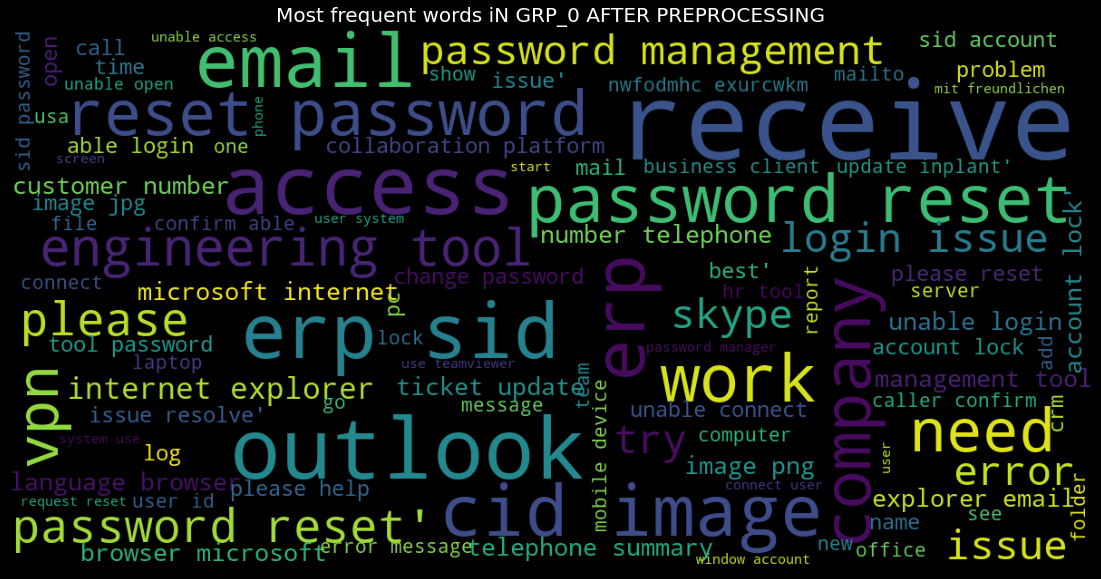

In [56]:
# view word cloud for GRP_0
grpvalue = 0
show_wordcloud(grpvalue,False)

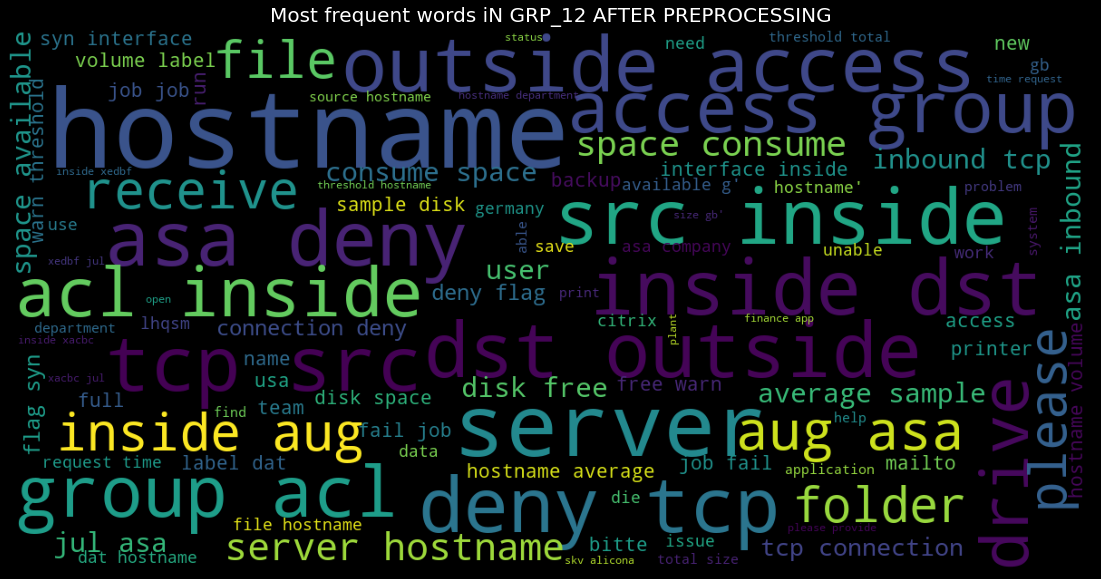

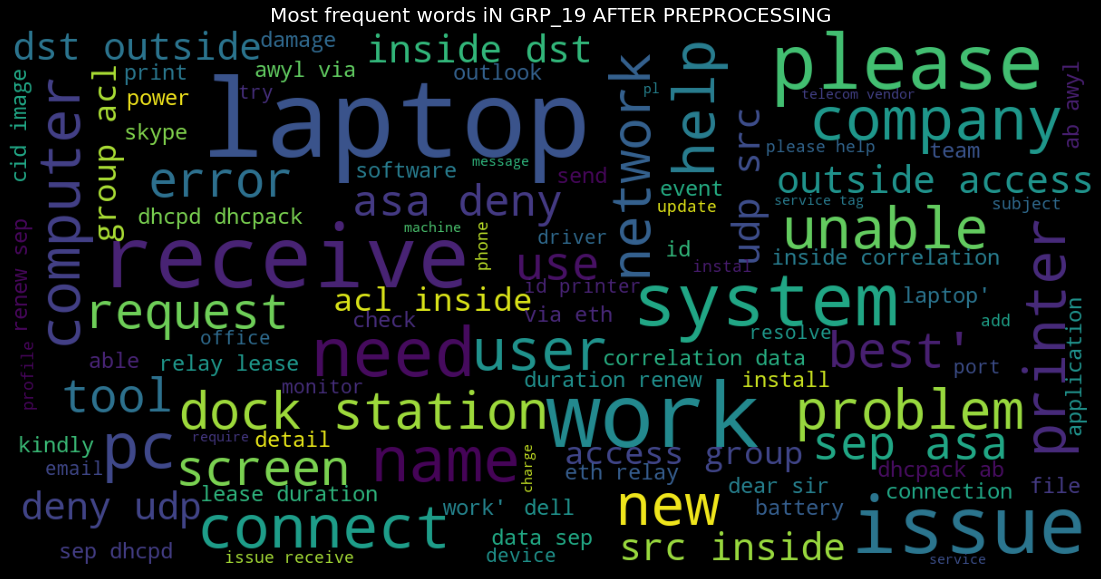

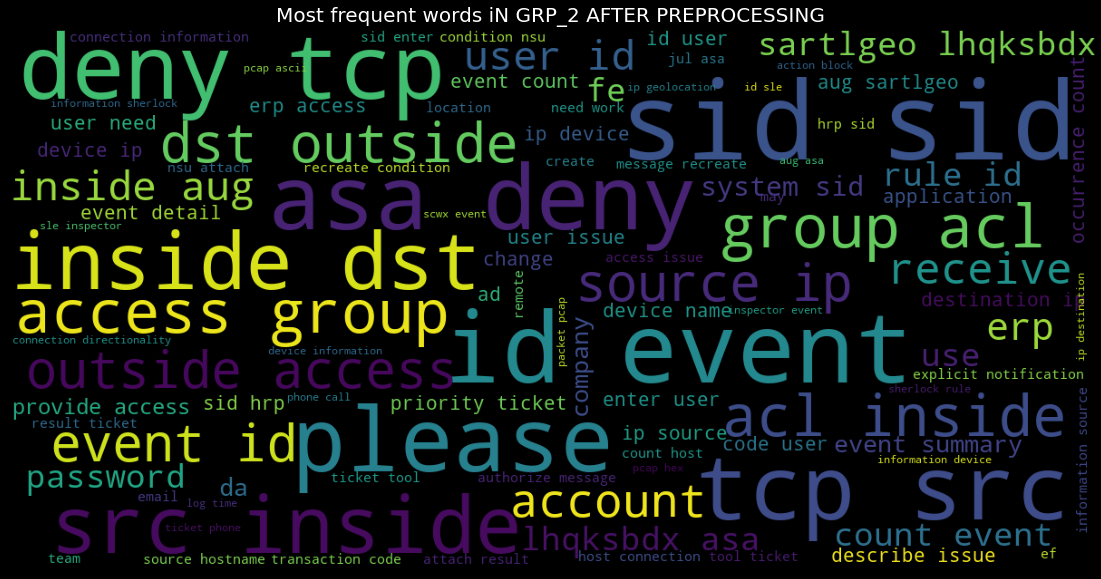

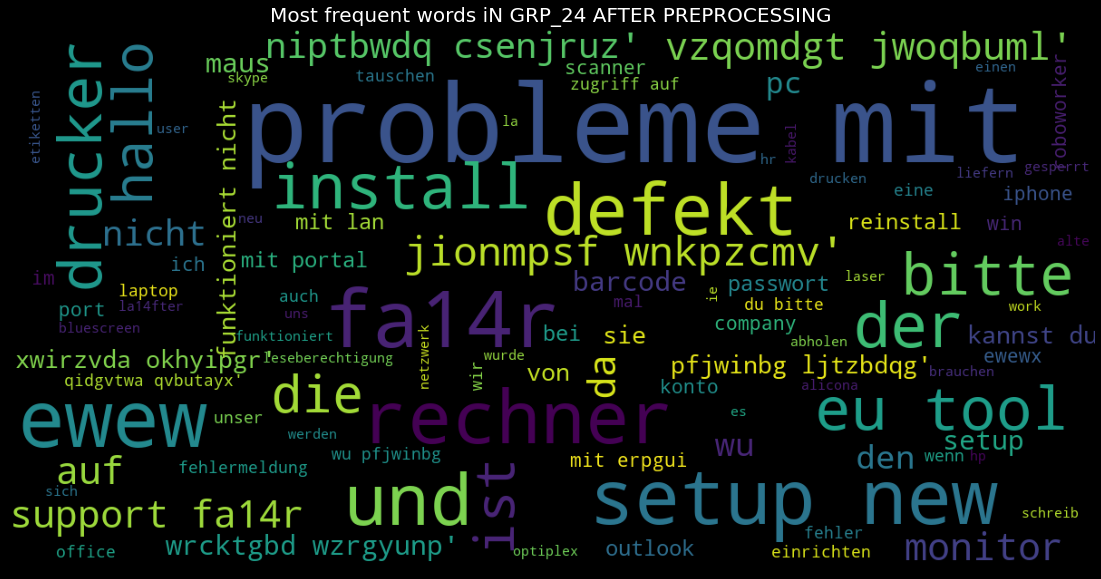

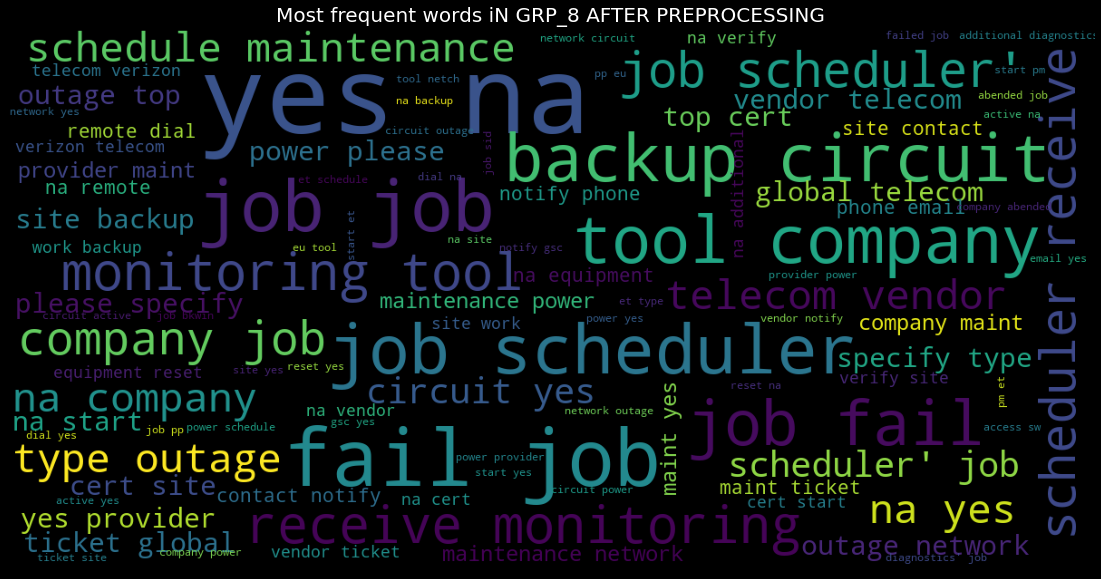

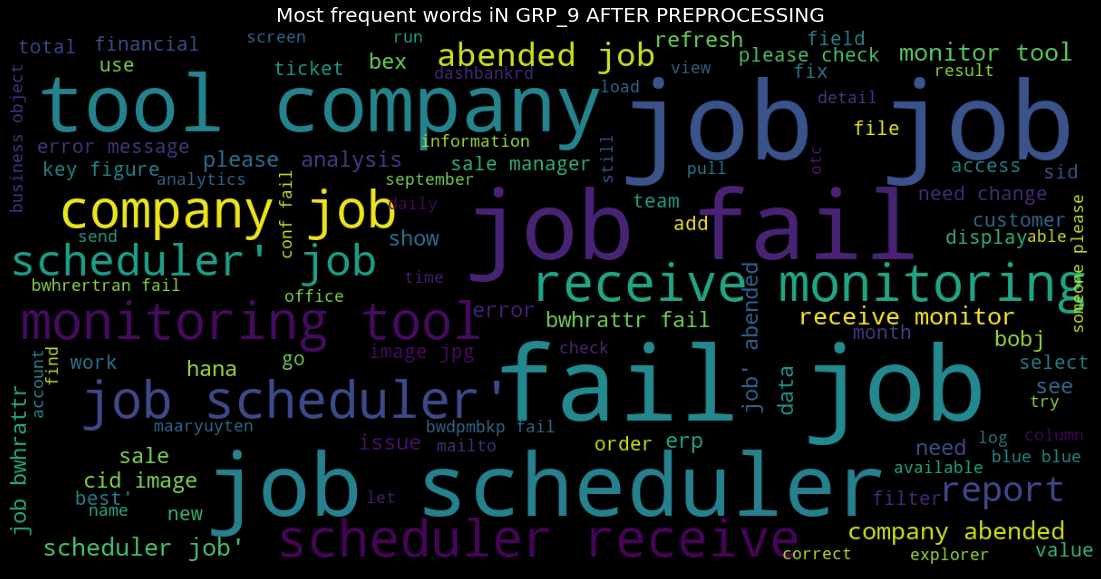

In [57]:
# view word cloud for GRP_12
grpvalue = 12
show_wordcloud(grpvalue,False)

# view word cloud for GRP_19
grpvalue = 19
show_wordcloud(grpvalue,False)

# view word cloud for GRP_2
grpvalue = 2
show_wordcloud(grpvalue,False)

# view word cloud for GRP_24
grpvalue = 24
show_wordcloud(grpvalue,False)

# view word cloud for GRP_8
grpvalue = 8
show_wordcloud(grpvalue,False)

# view word cloud for GRP_9
grpvalue = 9
show_wordcloud(grpvalue,False)


In [58]:
# incident_df_final['Full Description - After Lemmatized'][incident_df_final['Assignment group'].isin([multiplegroup])].tolist()

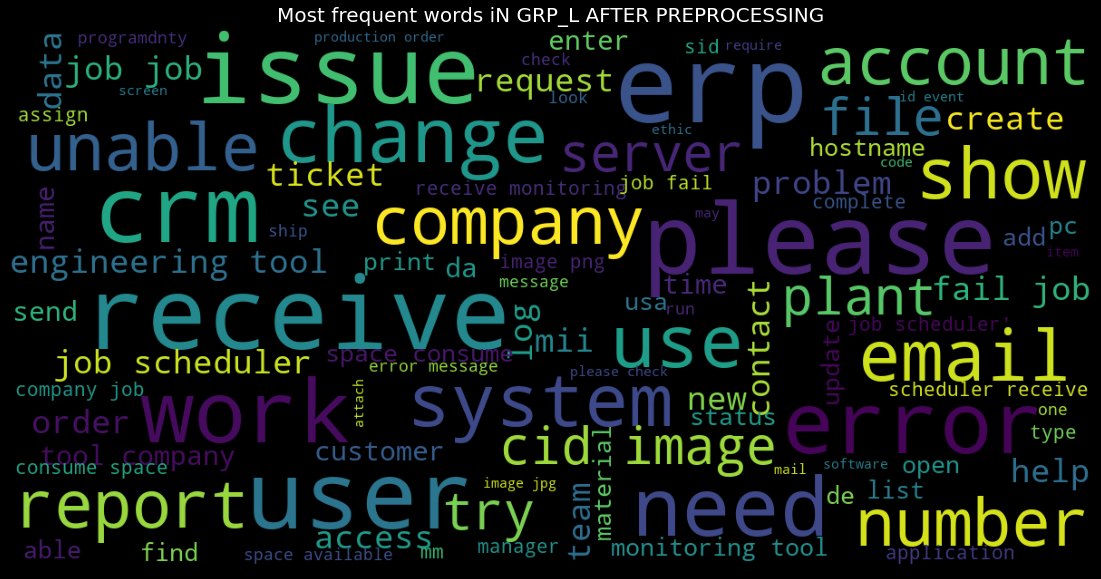

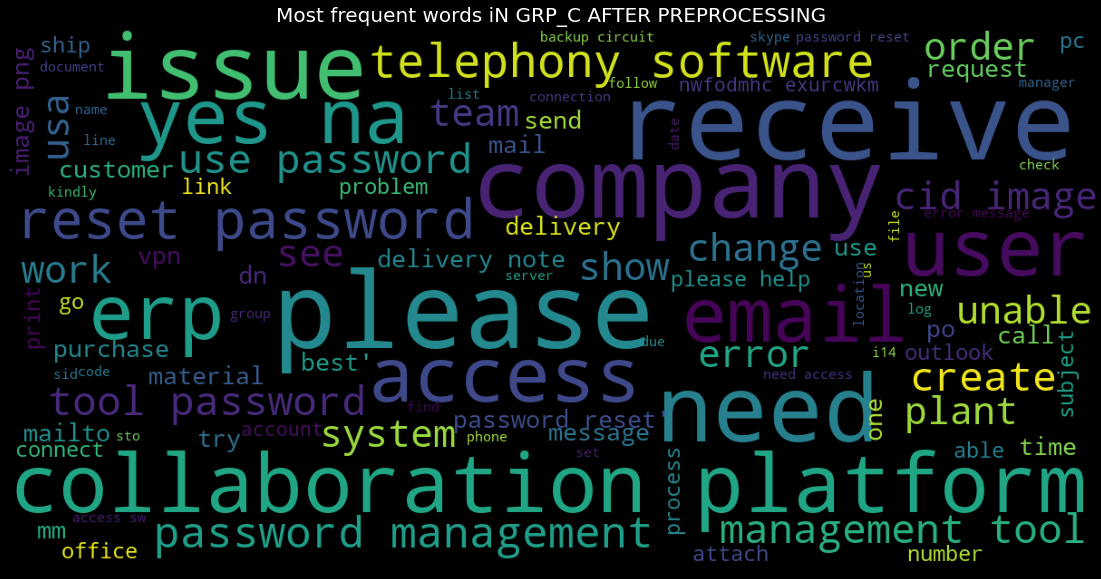

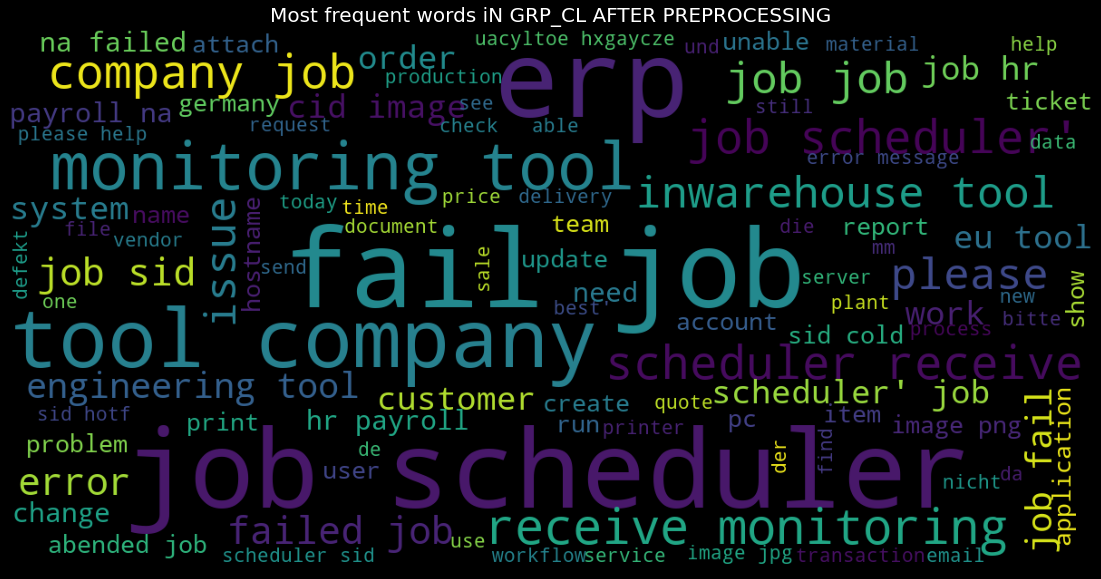

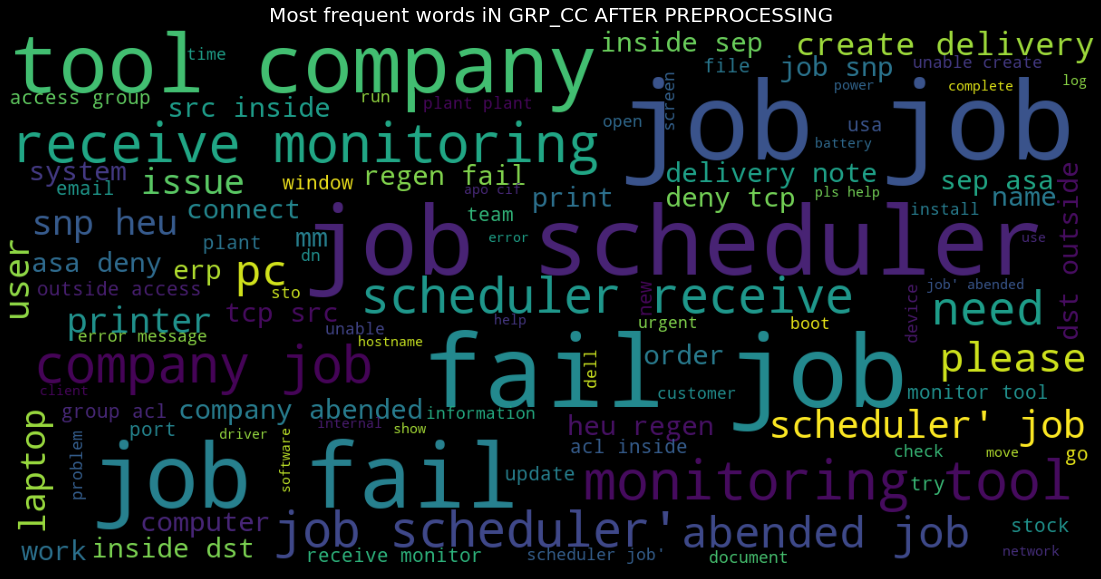

In [59]:
# multiplegroup = []

# view word cloud for GRP_L
grpvalue = 'L'
show_wordcloud(grpvalue,False)

# # view word cloud for sub groups under GRP_L
# multiplegroup = \"GRP_40\",\"GRP_28\",\"GRP_41\",\"GRP_30\",\"GRP_15\",\"GRP_42\",\"GRP_20\"
# show_wordcloud(multiplegroup,True)

# view word cloud for GRP_C
grpvalue = 'C'
show_wordcloud(grpvalue,False)
# "GRP_4","GRP_29","GRP_18","GRP_16","GRP_31","GRP_7","GRP_17","GRP_34"

# view word cloud for GRP_CL
grpvalue = 'CL'
show_wordcloud(grpvalue,False)
# "GRP_13","GRP_10","GRP_5","GRP_14","GRP_25","GRP_33"

# view word cloud for GRP_CC
grpvalue = 'CC'
show_wordcloud(grpvalue,False)
# "GRP_3","GRP_6"

In [60]:
## join the list members of the column
incident_df_final['Lemmatized_clean_upd']=["".join(description) for description in incident_df_final['Full Description - After Lemmatized'].values]

## From the word clouds it was noticed that the earlier Regular Expression replacement of numbers did not work
incident_df_final['Lemmatized_clean_upd'] = incident_df_final['Lemmatized_clean_upd'].str.replace('\d+', '')

print(incident_df_final['Lemmatized_clean_upd'])

0       login issue verify user detail employee manage...
1       outlook receive hmjdrvpb komuaywn team meeting...
2       not log vpn receive eylqgodm ybqkwiam not log ...
3                              unable access hr tool page
4                                             skype error
                              ...                        
8495    email not come zz mail receive avglmrts vhqmti...
8496                             telephony software issue
8497          vip window password reset tifpdchb pedxruyf
8498    machine na esta funcionando unable access mach...
8499    mehreren pc lassen sich verschiedene prgramdnt...
Name: Lemmatized_clean_upd, Length: 8407, dtype: object


### Build Supervised ML models on the dataset using TFIDF

Build the supervised models on the training data created. In this process, you have to do the following:


*   Create the vector counts using Count Vectoriser
*   Transform the word vector to tf-idf
*   Create the train & test data using the train_test_split on the tf-idf & topics






In [ ]:

vect = CountVectorizer()
X_train_cntvct = vect.fit_transform(incident_df_final['Lemmatized_clean_upd'])

# Save word vector
pickle.dump(vect.vocabulary_, open("count_vector.pk1", "wb"))

In [ ]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_cntvct)

# Save tfidf
pickle.dump(tfidf_transformer, open('tfidf.pk1', "wb"))

##### Common Functions

In [ ]:
# Visualize Confusion Matrix with heatmap
def plot_heatmap(y_test,y_pred):
  fig, ax = plt.subplots(figsize=(6, 6))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                  annot=True,
                  cbar=False,
                  cmap="RdYlGn", fmt = '0.1f')
  plt.xlabel("Actual label")
  plt.ylabel("Predicted label")
  plt.show()



Lets try few of the Supervised ML models on the train & test data:

Logistic Regression

Decision Tree Classifier

Random Forest Classifier

SVM Classifier

Naive Bayes Classifier

#### Train, Test Split of the final dataset

In [ ]:
# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, incident_df_final['New Assignment group'], test_size=0.25, random_state=79)


#### Build the different classifier models and train them on Train data

In [ ]:
logreg = LogisticRegression(random_state=79, solver='liblinear').fit(X_train, y_train)
dt = DecisionTreeClassifier(random_state=79).fit(X_train, y_train)
rf = RandomForestClassifier(random_state=79).fit(X_train, y_train)
svm = LinearSVC(random_state=79,C=1, penalty='l1', dual=False, loss='squared_hinge').fit(X_train, y_train)
nbayes = MultinomialNB(alpha=1.0).fit(X_train, y_train)

In [ ]:
# Getting the score of the base trained model
btr_score_logreg = logreg.score(X_test, y_test )

# Getting the score of the base model
btr_score_dt = dt.score(X_test, y_test)

# Getting the score of the base model
btr_score_rf = rf.score(X_test, y_test)

# Getting the score of the base model
btr_score_svm = svm.score(X_test, y_test)

# Getting the score of the base model
btr_score_nbayes = nbayes.score(X_test, y_test)


print('Score from pre-tuned Train model : ')
print('Logistic Regression      : ',btr_score_logreg)
print('Decision Tree Classifier : ',btr_score_dt)
print('Random Forest Classifer  : ',btr_score_rf)
print('SVM Classifier           : ',btr_score_svm)
print('Naive Bayes Classifier   : ',btr_score_nbayes)


Score from pre-tuned Train model : 
Logistic Regression      :  0.6546146527117032
Decision Tree Classifier :  0.6294005708848716
Random Forest Classifer  :  0.6693625118934349
SVM Classifier           :  0.6774500475737393
Naive Bayes Classifier   :  0.5689819219790676


#### Perform Hyper Parameter tuning step for each model

##### Logistic Regression hyper tuning

In [ ]:
logreg_grid = {"C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
                "solver": ["liblinear"]}
# Setup grid hyperparameter search for LogisticRegression
logreg_hpt = GridSearchCV(LogisticRegression(random_state=79),
                                param_grid=logreg_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)
# Fit random hyperparameter search model
logreg_hpt.fit(X_train, y_train);
# Check best parameters
logreg_hpt.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'C': 4, 'solver': 'liblinear'}

##### Decision Tree Classifier hyper tuning

In [ ]:
dt_grid = {"max_depth": [3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
           
# Setup grid hyperparameter search for Decision tree classifier
dt_hpt = GridSearchCV(DecisionTreeClassifier(random_state=79),
                                param_grid=dt_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
dt_hpt.fit(X_train, y_train);
# Check best parameters
dt_hpt.best_params_

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 8}

##### Random Forest Classifier hyper tuning

In [ ]:
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

# Setup random hyperparameter search for Random Forest Classifier
rf_hpt = RandomizedSearchCV(RandomForestClassifier(random_state=79),
                                param_distributions=rf_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
rf_hpt.fit(X_train, y_train);

# Check best parameters
rf_hpt.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.4895337773549001

In [ ]:
rf_grid = {"n_estimators": [200, 260, 300],
           "max_depth": [7, 10, 15],
           "min_samples_split": [10, 12, 14],
           "min_samples_leaf": [6, 8, 10]}

# Setup grid hyperparameter search for LogisticRegression
rf_hpt = GridSearchCV(RandomForestClassifier(random_state=79),
                                param_grid=rf_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
rf_hpt.fit(X_train, y_train);

# Check best parameters
rf_hpt.best_params_



Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'max_depth': 15,
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 260}

##### SVM Classifier hyper tuning

In [ ]:
svm_grid = {"C": [100, 10, 5, 4, 3, 2, 1, 1.0, 0.1, 0.01],
           "loss": ["squared_hinge"]}

# Setup random hyperparameter search for Random Forest Classifier
svm_hpt = RandomizedSearchCV(LinearSVC(random_state=79),
                                param_distributions=svm_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
svm_hpt.fit(X_train, y_train);

# Check best parameters
svm_hpt.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'C': 1, 'loss': 'squared_hinge'}

##### Naive Bayes Classifier hyper tuning

In [ ]:
nbayes_grid = {"alpha": [ 1.0, 0.1, 0.01,0.001]}

# Setup random hyperparameter search for Random Forest Classifier
nbayes_hpt = RandomizedSearchCV(MultinomialNB(),
                                param_distributions=nbayes_grid,
                                cv=5,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
nbayes_hpt.fit(X_train, y_train);

# Check best parameters
nbayes_hpt.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


{'alpha': 0.01}

#### Evaluating the hyper tuned model

In [ ]:

atu_score_logreg = logreg_hpt.score(X_test, y_test)
atu_score_dt = dt_hpt.score(X_test, y_test)
atu_score_rf = rf_hpt.score(X_test, y_test)
atu_score_svm = svm_hpt.score(X_test, y_test)
atu_score_nbayes = nbayes_hpt.score(X_test, y_test)

print('Score After model tuning done : ')
print('Logistic Regression      : ',atu_score_logreg)
print('Decision Tree Classifier : ',atu_score_dt)
print('Random Forest Classifer  : ',atu_score_rf)
print('SVM Classifier           : ',atu_score_svm)
print('Naive Bayes Classifier   : ',atu_score_nbayes)


Score After model tuning done : 
Logistic Regression      :  0.6888677450047573
Decision Tree Classifier :  0.5965746907706946
Random Forest Classifer  :  0.5095147478591817
SVM Classifier           :  0.6912464319695528
Naive Bayes Classifier   :  0.6698382492863939


#### Pickle each model for future use

In [ ]:
# Save Logistic Regression Model
pickle.dump(logreg_hpt, open("logreg_model.pk1", "wb"))

# Save Deccision Tree Classifier Model
pickle.dump(dt_hpt, open("dt_model.pk1", "wb"))

# Save Random Forest Model
pickle.dump(rf_hpt, open("rf_model.pk1", "wb"))

# Save SVM classifier Model
pickle.dump(svm_hpt, open("svm_model.pk1", "wb"))

# Save Random Forest Model
pickle.dump(nbayes_hpt, open("nbayes_model.pk1", "wb"))


#### Evaluate the model

Load the individual models and make prediction on X_test data to evaluate the model

In [ ]:
# Load pickled Logistic Refression model
logreg_model = pickle.load(open("logreg_model.pk1", "rb"))
# Make predictions on test data
y_pred_logreg_model = logreg_model.predict(X_test)

# Load pickled Decision Tree model
dt_model = pickle.load(open("dt_model.pk1", "rb"))
# Make predictions on test data
y_pred_dt_model = dt_model.predict(X_test)

# Load pickled Random Forest model
rf_model = pickle.load(open("rf_model.pk1", "rb"))
# Make predictions on test data
y_pred_rf_model = rf_model.predict(X_test)

# Load pickled SVM model
svm_model = pickle.load(open("svm_model.pk1", "rb"))
# Make predictions on test data
y_pred_svm_model = svm_model.predict(X_test)

# Load pickled Naive Bayes model
nbayes_model = pickle.load(open("nbayes_model.pk1", "rb"))
# Make predictions on test data
y_pred_nbayes_model = nbayes_model.predict(X_test)

#### Build the Confustion matrix and heat map view

In [ ]:
### DONT REMOVE THIS CODE - lets keep for reference

# # Print Confusion Matrix
# print('Logistic Regression \n')
# print(confusion_matrix(y_test, y_pred_logreg_model))
# print('\n')
# print('Decision Tree Classifier \n')
# print(confusion_matrix(y_test, y_pred_dt_model))
# print('\n')
# print('Random Forest Classifier \n')
# print(confusion_matrix(y_test, y_pred_rf_model))
# print('\n')
# print('SVM Classifier \n')
# print(confusion_matrix(y_test, y_pred_svm_model))
# print('\n')
# print('Naive Bayes Classifier \n')
# print(confusion_matrix(y_test, y_pred_nbayes_model))
# print('\n')

Logistic Regression 



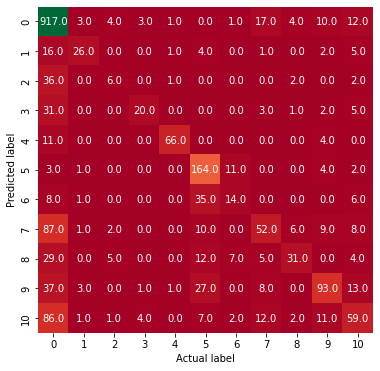



Decision Tree Classifier 



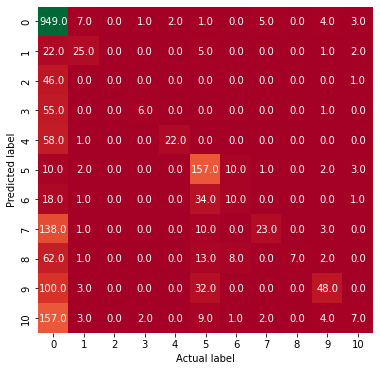



Random Forest Classifier 



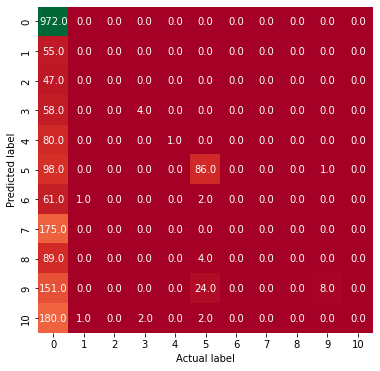



SVM Classifier 



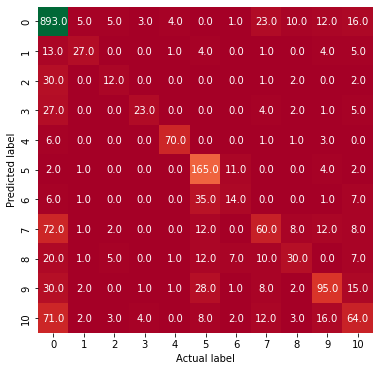



Naive Bayes Classifier 



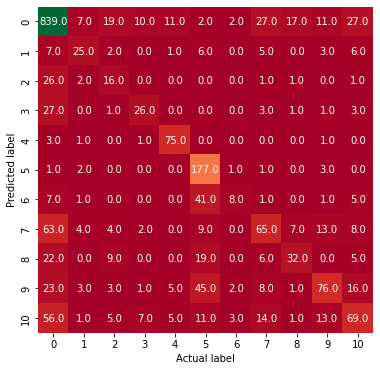

In [ ]:
# Visualize Confusion Matrix with heatmap

print('Logistic Regression \n')
plot_heatmap(y_test,y_pred_logreg_model)
print('\n')
print('Decision Tree Classifier \n')
plot_heatmap(y_test,y_pred_dt_model)
print('\n')
print('Random Forest Classifier \n')
plot_heatmap(y_test,y_pred_rf_model)
print('\n')
print('SVM Classifier \n')
plot_heatmap(y_test,y_pred_svm_model)
print('\n')
print('Naive Bayes Classifier \n')
plot_heatmap(y_test,y_pred_nbayes_model)
print('\n')

#### Classification Report for each model
Print the Classification report for each of the model against each Class

In [ ]:
#  Print Classification Report for the models
print('Logistic Regression \n')
print(classification_report(y_test, y_pred_logreg_model))
print('\n')

print('Decision Tree Classifier \n')
print(classification_report(y_test, y_pred_dt_model))
print('\n')

print('Random Forest Classifier \n')
print(classification_report(y_test, y_pred_rf_model))
print('\n')

print('SVM Classifier \n')
print(classification_report(y_test, y_pred_svm_model))
print('\n')

print('Naive Bayes Classifier \n')
print(classification_report(y_test, y_pred_nbayes_model))
print('\n')

Logistic Regression 

              precision    recall  f1-score   support

       GRP_0       0.73      0.94      0.82       972
      GRP_12       0.72      0.47      0.57        55
      GRP_19       0.33      0.13      0.18        47
       GRP_2       0.71      0.32      0.44        62
      GRP_24       0.94      0.81      0.87        81
       GRP_8       0.63      0.89      0.74       185
       GRP_9       0.40      0.22      0.28        64
       GRP_C       0.53      0.30      0.38       175
      GRP_CC       0.67      0.33      0.45        93
      GRP_CL       0.69      0.51      0.58       183
       GRP_L       0.51      0.32      0.39       185

    accuracy                           0.69      2102
   macro avg       0.63      0.48      0.52      2102
weighted avg       0.67      0.69      0.66      2102



Decision Tree Classifier 

              precision    recall  f1-score   support

       GRP_0       0.59      0.98      0.73       972
      GRP_12       0.57    

#### Metrics comparison

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# Calculate F1 Score of tuned model using weighted average method

f1_logreg_tuned = f1_score(y_test, y_pred_logreg_model , average="weighted")
f1_dt_tuned = f1_score(y_test, y_pred_dt_model, average="weighted")
f1_rf_tuned = f1_score(y_test, y_pred_rf_model, average="weighted")
f1_svm_tuned = f1_score(y_test, y_pred_svm_model, average="weighted")
f1_nbayes_tuned = f1_score(y_test, y_pred_nbayes_model, average="weighted")

print('F1 Score : ')
print('Logistic Regression      : ',f1_logreg_tuned)
print('Decision Tree Classifier : ',f1_dt_tuned)
print('Random Forest Classifer  : ',f1_rf_tuned)
print('SVM Classifier           : ',f1_svm_tuned)
print('Naive Bayes Classifier   : ',f1_nbayes_tuned)

F1 Score : 
Logistic Regression      :  0.6561692468661415
Decision Tree Classifier :  0.5067047458091534
Random Forest Classifer  :  0.36759464728374
SVM Classifier           :  0.6667031065454189
Naive Bayes Classifier   :  0.649158455581844


In [ ]:
acc_logreg_tuned = accuracy_score(y_test, y_pred_logreg_model)
acc_dt_tuned = accuracy_score(y_test, y_pred_dt_model)
acc_rf_tuned = accuracy_score(y_test, y_pred_rf_model)
acc_svm_tuned = accuracy_score(y_test, y_pred_svm_model)
acc_nbayes_tuned = accuracy_score(y_test, y_pred_nbayes_model)

print('F1 Score : ')
print('Logistic Regression      : ',acc_logreg_tuned)
print('Decision Tree Classifier : ',acc_dt_tuned)
print('Random Forest Classifer  : ',acc_rf_tuned)
print('SVM Classifier           : ',acc_svm_tuned)
print('Naive Bayes Classifier   : ',acc_nbayes_tuned)

F1 Score : 
Logistic Regression      :  0.6888677450047573
Decision Tree Classifier :  0.5965746907706946
Random Forest Classifer  :  0.5095147478591817
SVM Classifier           :  0.6912464319695528
Naive Bayes Classifier   :  0.6698382492863939


In [ ]:
# Create a dataframe to store F1 Scores of all models we will build
model_acore_summary_df = pd.DataFrame([{'Model': 'Logistic Regression',
                         'Model Trained Accuracy Score (untuned)': format(btr_score_logreg, '0.2%'),
                         'Model Trained Accuracy Score (tuned)': format(atu_score_logreg, '0.2%'),
                         'Model Prediction Accuracy Score (tuned)': format(acc_logreg_tuned, '0.2%'), 
                         'Model Prediction F1 Score (tuned)': format(f1_logreg_tuned, '0.2%')}])
model_acore_summary_df.loc[len(model_acore_summary_df.index)] = ['Decision Tree Classifier', format(btr_score_dt, '0.2%'),format(atu_score_dt, '0.2%'),format(acc_dt_tuned, '0.2%'),format(f1_dt_tuned, '0.2%')]
model_acore_summary_df.loc[len(model_acore_summary_df.index)] = ['Random Forest Classifier', format(btr_score_rf, '0.2%'),format(atu_score_rf, '0.2%'),format(acc_rf_tuned, '0.2%'),format(f1_rf_tuned, '0.2%')]
model_acore_summary_df.loc[len(model_acore_summary_df.index)] = ['SVM Classifier', format(btr_score_svm, '0.2%'),format(atu_score_svm, '0.2%'),format(acc_svm_tuned, '0.2%'),format(f1_svm_tuned, '0.2%')]
model_acore_summary_df.loc[len(model_acore_summary_df.index)] = ['Naive Bayes Classifier', format(btr_score_nbayes, '0.2%'),format(atu_score_nbayes, '0.2%'),format(acc_nbayes_tuned, '0.2%'),format(f1_nbayes_tuned, '0.2%')]



In [ ]:
model_acore_summary_df

Model Model Trained Accuracy Score (untuned)  \
0       Logistic Regression                                 65.46%   
1  Decision Tree Classifier                                 62.94%   
2  Random Forest Classifier                                 66.94%   
3            SVM Classifier                                 67.75%   
4    Naive Bayes Classifier                                 56.90%   

  Model Trained Accuracy Score (tuned)  \
0                               68.89%   
1                               59.66%   
2                               50.95%   
3                               69.12%   
4                               66.98%   

  Model Prediction Accuracy Score (tuned) Model Prediction F1 Score (tuned)  
0                                  68.89%                            65.62%  
1                                  59.66%                            50.67%  
2                                  50.95%                            36.76%  
3                                  69.12%                            66.67%  
4                                  66.98%                            64.92%

### To_Be_Done:

Work on EDA to fine tune to Words in the given incident data

Work on logical grouping of the incident groups

### Phase 2 work to continue




#### Cluster identification  (This will be explored more in phase 2 of the Capstone project )



In [ ]:
# We now Use TFIDF Vectorization method to convert the Words in the description to number vectors. Once done, we will use clustering mechanisms to see if there are clusters that can be visualized. We will use KMeans find out the Optimal number of Clusters and then visualize the same.

In [ ]:
def find_optimal_clusters(data, max_k):
  iters = range(2, max_k+1, 2)
  print ("Iters", iters)
  sse = []
  for k in iters:
      sse.append(MiniBatchKMeans(n_clusters=k, init_size=200, batch_size=300, random_state=20).fit(data).inertia_)
      print('Fit {} clusters'.format(k))
      
  f, ax = plt.subplots(1, 1,figsize=(15,5))
  
  ax.plot(iters, sse, marker='o')
  ax.set_xlabel('Cluster Centers')
  ax.set_xticks(iters)
  ax.set_xticklabels(iters)
  ax.set_ylabel('SSE')
  ax.set_title('SSE by Cluster Center Plot')
  #set_size(50,5)
  plt.show()

In [ ]:
## Function to PLot the Clusters using Tsne and PCA
def plot_tsne_pca(data, labels, size_d, component_count):
  max_label = max(labels)
  max_items = np.random.choice(range(data.shape[0]), size=size_d, replace=False)
  
  pca = PCA(n_components=component_count).fit_transform(data[max_items,:].todense())
  tsne = TSNE().fit_transform(PCA(n_components=component_count).fit_transform(data[max_items,:].todense()))
  
  
  idx = np.random.choice(range(pca.shape[0]), size=size_d, replace=False)
  label_subset = labels[max_items]
  label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
  
  f, ax = plt.subplots(1, 2, figsize=(14, 6))
  
  ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
  ax[0].set_title('PCA Cluster Plot')
  
  ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
  ax[1].set_title('TSNE Cluster Plot')

In [ ]:
  # create teh vectorizer
tfidf = TfidfVectorizer(min_df=5 ,use_idf=True )


## fitting the vectorizer
tfidf.fit(incident_df_final.Lemmatized_clean_upd)
text = tfidf.transform(incident_df_final.Lemmatized_clean_upd)

## Get Feature Names and Store the values in a Dataframe
tf_matrix = text.toarray()
vocab = tfidf.get_feature_names()
tf_df = pd.DataFrame(np.round(tf_matrix, 2), columns=vocab)

## View the nunmber of Features
tf_df.columns

Index(['aa', 'ab', 'abap', 'abend', 'abended', 'aber', 'aberprafen', 'ability',
       'able', 'abort',
       ...
       'zu', 'zugriff', 'zum', 'zur', 'zuracksetzen', 'zusammen', 'zuxcfonv',
       'zwirhcol', 'zywoxerf', 'zz'],
      dtype='object', length=2515)

In [ ]:
tf_df.shape


(8407, 2515)

Iters range(2, 74, 2)
Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters
Fit 52 clusters
Fit 54 clusters
Fit 56 clusters
Fit 58 clusters
Fit 60 clusters
Fit 62 clusters
Fit 64 clusters
Fit 66 clusters
Fit 68 clusters
Fit 70 clusters
Fit 72 clusters


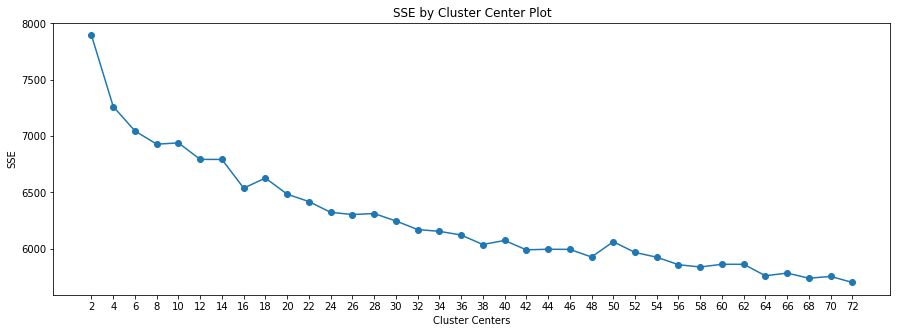

In [ ]:
find_optimal_clusters(text, 73)


In [ ]:
clusters = MiniBatchKMeans(n_clusters=34, init_size=100, batch_size=200, random_state=20).fit_predict(text)
clusters.shape

(8407,)

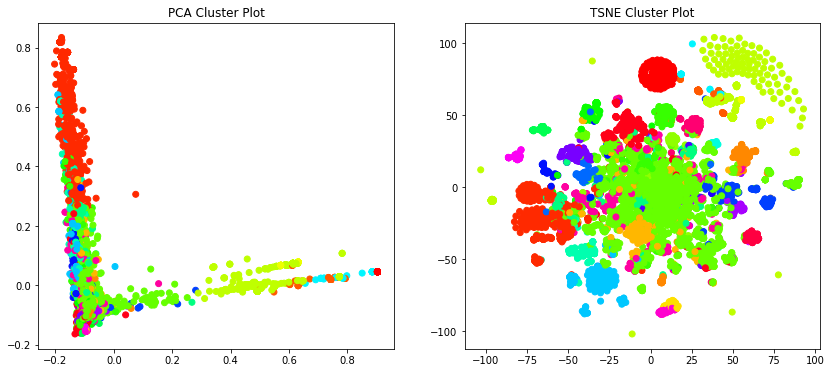

In [ ]:
import matplotlib.cm as cm
num_features = 8372
pca_comp_count = 100
plot_tsne_pca(text, clusters,num_features,pca_comp_count )


In [ ]:
df = incident_df_final.copy()
dfL = df[(df["New Assignment group"] == 'GRP_L')] 
dfC = df[(df['New Assignment group'] == "GRP_C")] 
dfCL = df[(df['New Assignment group'] == "GRP_CL")] 
dfCC = df[(df['New Assignment group'] == "GRP_CC")] 

# or (df['New Assignment group'] == "GRP_C") or (df['New Assignment group'] == "GRP_CL") or (df['New Assignment group'] == "GRP_CC")]

df1 = pd.concat( [dfL,dfC,dfCL,dfCC])
# df1 = pd..append( dfL,dfC,dfCL,dfCC)
df1

Assignment group New Assignment group  \
6               GRP_1                GRP_L   
84             GRP_11                GRP_L   
141            GRP_15                GRP_L   
185            GRP_20                GRP_L   
197            GRP_21                GRP_L   
...               ...                  ...   
8318            GRP_6               GRP_CC   
8374            GRP_3               GRP_CC   
8385            GRP_3               GRP_CC   
8487            GRP_3               GRP_CC   
8494            GRP_3               GRP_CC   

                                       Full Description  \
6     event: critical:HostName_221.company.com the v...   
84    engineering tool drawing originals in pdf form...   
141   channel partner receiving multiple emails from...   
185   data not correctly pulled for all the employee...   
197    i need to approve the new product requests below   
...                                                 ...   
8318  abended job in job_scheduler: apo_cif_pds5_eu ...   
8374  insert option not wrking in excel insert optio...   
8385     xerox copier prtqx7302 will not scan to email.   
8487  telephony_software is missing from pc pc recei...   
8494  tablet needs reimaged due to multiple issues w...   

                    Full Description - After Lemmatized  \
6     event critical hostname company value mountpoi...   
84    engineering tool draw original pdf format not ...   
141   channel partner receive multiple email erp urg...   
185   data not correctly pull employee travel tool a...   
197                    need approve new product request   
...                                                 ...   
8318  abended job job scheduler apo cif pd eu receiv...   
8374  insert option not wrking excel insert option n...   
8385                  xerox copier prtqx not scan email   
8487  telephony software miss pc pc receive multiple...   
8494  tablet need reimaged due multiple issue crm wi...   

                                   Lemmatized_clean_upd  
6     event critical hostname company value mountpoi...  
84    engineering tool draw original pdf format not ...  
141   channel partner receive multiple email erp urg...  
185   data not correctly pull employee travel tool a...  
197                    need approve new product request  
...                                                 ...  
8318  abended job job scheduler apo cif pd eu receiv...  
8374  insert option not wrking excel insert option n...  
8385                  xerox copier prtqx not scan email  
8487  telephony software miss pc pc receive multiple...  
8494  tablet need reimaged due multiple issue crm wi...  

[2587 rows x 5 columns]

Iters range(2, 74, 2)
Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters
Fit 52 clusters
Fit 54 clusters
Fit 56 clusters
Fit 58 clusters
Fit 60 clusters
Fit 62 clusters
Fit 64 clusters
Fit 66 clusters
Fit 68 clusters
Fit 70 clusters
Fit 72 clusters


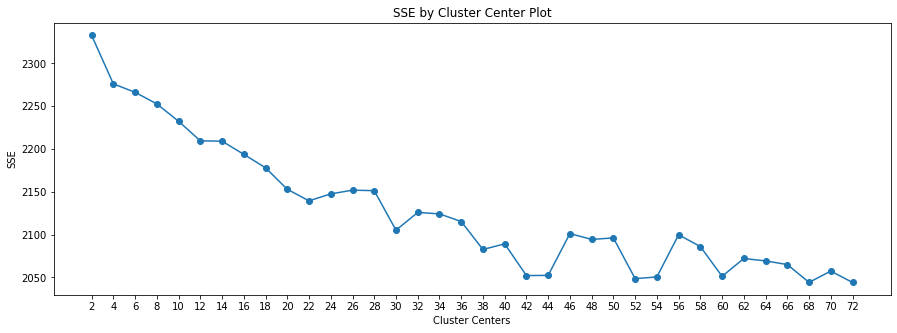

In [ ]:


tfidf = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tfidf.fit(df1.Lemmatized_clean_upd)
text1 = tfidf.transform(df1.Lemmatized_clean_upd)

tf_matrix = text1.toarray()
vocab = tfidf.get_feature_names()
tf_df = pd.DataFrame(np.round(tf_matrix, 2), columns=vocab)
find_optimal_clusters(text1, 73)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=32, init_size=100, batch_size=200, random_state=20).fit_predict(text1)
clusters.shape

(2587,)

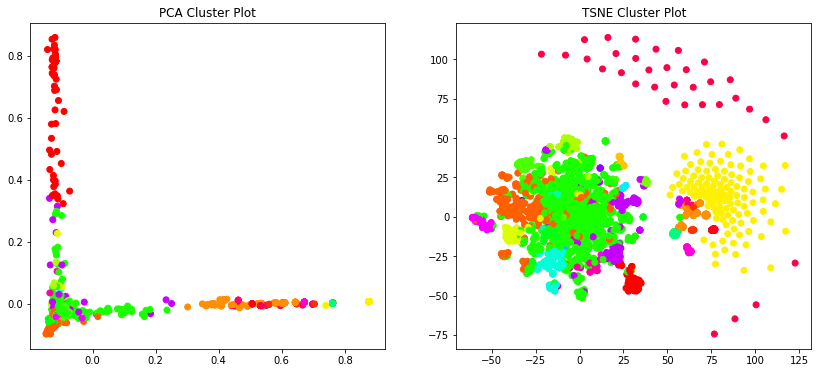

In [ ]:
num_features = 2500
pca_comp_count = 100
plot_tsne_pca(text1, clusters,num_features,pca_comp_count )

We can try and do some analysis on the clustering for the data that are GRP_L, GRP_C, GRP_CL, GRP_CC


### End of Code